In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import YouTubeVideo

# Lecture 20 Part 3 #

# <span style="color: darkblue">Variance of a Sum</span> #

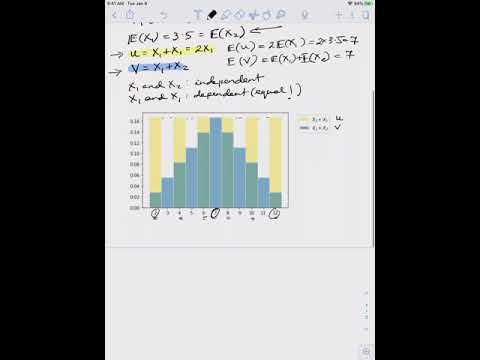

In [2]:
YouTubeVideo("d_kRfFDorbo")

Read Slides 34-39. The key takeaway is in Slide 39:

$$
\mathbb{V}ar(X+Y) ~ = ~ \mathbb{V}ar(X) + \mathbb{V}ar(Y) ~ \text{if} ~ X \text{ and } Y \text{ are independent}
$$

Skip slides 40-42 (they are discussed at the end of the notebook) and go directly to Slide 43. That way you can get used to the calculations first, and then go back and look at the reason behind the main result.

# <span style="color: darkblue">Sums of Independent Random Variables</span> #

We will establish this later, but for now just accept that **variance is additive if you are adding INDEPENDENT random variables.** It need not be additive otherwise.

**Work through Slides 44-48** line by line. In particular, try to get to a point where you can reproduce Slides 45 and 47 yourself, without any references. The variance of an indicator is dervied in Part 2, in the section called "Alternative Calculation (Slide 30)". 

**Question 1:** A bench in a stadium holds 25 people. Assume their weights are independent and identically distributed, each with a mean of 150 pounds and an SD of 40 pounds. Find the expectation and SD of the total weight of the 25 people.

<details>
    <summary>Answer 1</summary>
    3,750 pounds, 200 pounds
</details>

**Question 2:** Suppose I had deleted just the phrase "and identically distributed" from Question 1, leaving everything else as is. Could you still have answered the question, and if so, would the answers have been the same as those you gave above?

<details>
    <summary>Answer 2</summary>
    Yes; same answers
</details>

# <span style="color: darkblue">Central Limit Theorem</span> #

You know the expectation (also known as mean) and variance of an i.i.d. sample sum. But that doesn't tell you the shape of the distribution of the sum.

The Central Limit Theorem is a remarkable result is that if the sample size is large, then the distribution of the sum is roughly normal regardless of the underlying distribution of each sampled individual.

**Read Slides 50-51.**

I wrote a quick-and-dirty function `iid_sum_hist` that draws an empirical histogram of the distribution of $S_n = X_1 + X_2 + \cdots + X_n$ where $X_1, X_2, \ldots, X_n$ are i.i.d. and have values in a finite set of integers.

You get to specify the distribution of $X_1$. The arguments of `iid_sum_hist` are:

- an array of the possible values of $X_1$
- an array of the corresponding probabilities
- the sample size $n$
- the number of times to simulate $S_n$

It's common in probability theory to refer to i.i.d. $X_1, X_2, \ldots, X_n$ as "copies" of each other, with the understanding that the copies are made independently (see "Equality" at end of Part 1). That explains the title of the plot; apologies for the bad grammar when $n=1$.

In [3]:
def iid_sum_hist(vals=[0], probs=[1], n=1, repeat=1):
    """Draws the empirical histogram of the simulated 
    sum of n i.i.d. draws from 
    the distribution specified by vals and probs;
    number of repetitions = repeat"""
    sums = [np.random.choice(vals, p=probs, size=n).sum() for i in range(repeat)]
    a = min(sums)-0.5
    b = max(sums)+0.6
    int_bins = np.arange(a, b, 1)
    plt.figure(figsize=(12, 5))
    plt.hist(sums, bins=int_bins, ec='w')
    plt.title('Sum of '+str(n)+' IID Copies')
    

Here's an empirical version of the exact binomial distribution in Slide 48.

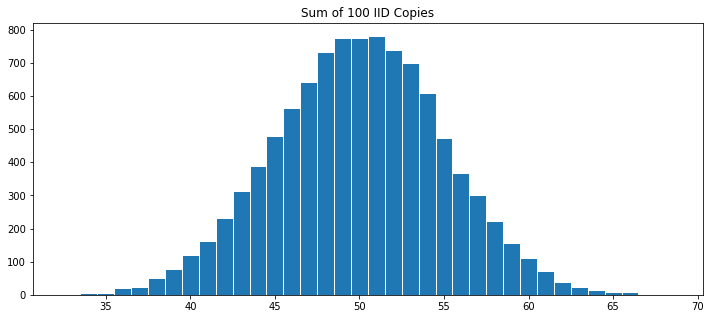

In [4]:
iid_sum_hist([0, 1], [0.5, 0.5], 100, 10000)

Here are a couple of my favorites, to compare with each other.

First up is the uniform distribution on the values 1, 2, and 3.

- Set $n=1$ first to make sure you have the right distribution.
- Then try $n=10$.

What do you notice?

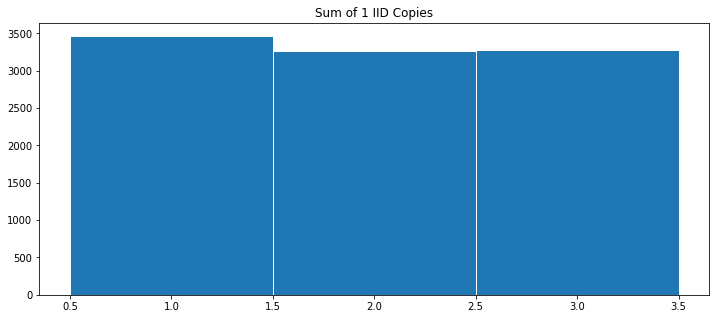

In [5]:
possible_values = [1, 2, 3]
probabilities = np.ones(3)/3
iid_sum_hist(possible_values, probabilities, 1, 10000)

Next, a small change to the distribution of $X_1$: instead of being uniform on 1, 2, and 3, it's now uniform on 1, 2, and 9. Do the same thing as before:

- Set $n=1$ first.
- Then set $n=10$.

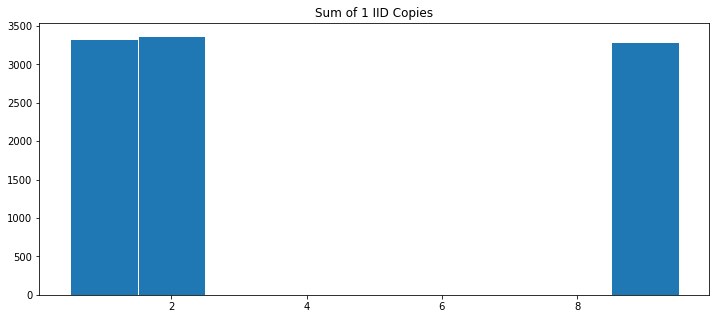

In [6]:
possible_values = [1, 2, 9]
probabilities = np.ones(3)/3
iid_sum_hist(possible_values, probabilities, 1, 10000)

Not all distributions are smooth! Set $n=25$ to get a stegosaurus.

Keep increasing $n$ and you'll see the normal curve begin to appear.

At this point you should look at Slide 52.

# <span style="color: darkblue">IID Sample Sum and Mean</span> #

Gotta know their properties. Sums and means make the data science world go round.

First note that $\bar{X}_n$ is "the mean of the sample of size $n$". The $n$ denotes the sample size, not the $n$th variable in the list.

**Deeply internalize Slides 45 and 54.** Compare and contrast the results for the sum and the mean. Notice:

- The distribution of $S_n$ shifts to the right and flattens out as $n$ gets large.
- The distribution of $\bar{X}_n$ always balances at $\mu$, and gets narrower as $n$ gets large.

**Accuracy** (slides 55-56) doesn't come cheap. 

- To reduce $\mathbb{SD}(\bar{X}_n)$ by a factor of 10, you have to multiply the sample size by $10^2 = 100$.
- The Square Root Law rephrases this. Look for a graph of $\frac{\sigma}{\sqrt{n}}$ in this [Data 8 section](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#The-SD-of-All-the-Sample-Means) and read the subsequent discussion.

### Questions ###

**Question 3:** Continuing Question 1, let $\bar{X}_{25}$ be the mean weight of the 25 people. True or false: $\bar{X}_{25} = 150$ pounds.

<details>
    <summary>Answer 3</summary>
    False
</details>

**Question 4:** Continuing Question 1, sketch the normal approximation to the distribution of the mean weight of the 25 people. Mark the expectation and SD of the mean weight appropriately on your sketch.

<details>
    <summary>Answer 4</summary>
    Center 150, points of inflection at 142 and 158
</details>

# <span style="color: darkblue">Covariance and Correlation</span> #

This section shows how the addition rule for variance arises.

For all $X$ and $Y$,

$$
\mathbb{V}ar(X+Y) ~ = ~ \mathbb{V}ar(X) + \mathbb{V}ar(Y) + 2\mathbb{E}((X-\mathbb{E}(X))(Y-\mathbb{E}(Y)))
$$

The cross-product term is called the *covariance* of $X$ and $Y$:

$$
\mathbb{C}ov(X, Y) ~ = ~ \mathbb{E}((X-\mathbb{E}(X))(Y-\mathbb{E}(Y)))
$$

So (Slide 39) we know that

$$
\mathbb{V}ar(X+Y) ~ = ~ \mathbb{V}ar(X) + \mathbb{V}ar(Y) ~ \iff ~ \mathbb{C}ov(X, Y) = 0
$$

So it's a good idea to examine when $\mathbb{C}ov(X, Y) = 0$.

Slide 41 shows how normalizing the covariance by the two SDs results in the correlation between $X$ and $Y$. The correlation $r(X,Y)$ is the *mean of the product of the variables in standard units*, analogous to the Data 8 definition of correlation for data.

So (Slide 42) $\mathbb{C}ov(X, Y) = 0 ~ \iff ~ r(X, Y) = 0$.

Our result, then, is

$$
\mathbb{V}ar(X+Y) ~ = ~ \mathbb{V}ar(X) + \mathbb{V}ar(Y) ~ \iff ~ X \text{ and } Y \text{ are uncorrelated}
$$

It makes sense (and can be proved) that if $X$ and $Y$ are independent, then they are uncorrelated. So the **addition rule for variance** is

$$
\mathbb{V}ar(X+Y) ~ = ~ \mathbb{V}ar(X) + \mathbb{V}ar(Y) ~ \text{if} ~ X \text{ and } Y \text{ are independent}
$$

Which, as you can see by scrolling up, is exactly where we started.